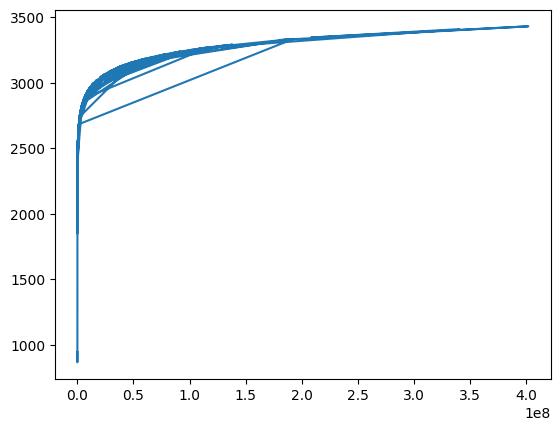

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = {
    'Throughput': [3328.4, 3431.3],
    'Operational Cost': [498260000, 514695000]
}
df = pd.DataFrame(data)
monthly = pd.read_csv('../cargor_model_monthly.csv')

throughput = monthly['Total Container Throughput (Thousand Twenty-Foot Equivalent Units)']
throughput_list = throughput.to_list()

def logarithmic_function(throughput, a, b):
    return np.power(10,(throughput-b)/a)
a = 300
b = 850
estimated_throughput_values = throughput
estimated_opcost = [logarithmic_function(x, a, b) for x in estimated_throughput_values]

estimated_data = pd.DataFrame({
    'Throughput': estimated_throughput_values, 
    'Operational Cost': estimated_opcost
}).reset_index(drop=True)

combined_df = pd.concat([estimated_data, df], ignore_index=True)

plt.plot(estimated_data['Operational Cost'], estimated_data['Throughput'])
monthly['Operational Cost'] = monthly['Total Container Throughput (Thousand Twenty-Foot Equivalent Units)'].apply(lambda x:logarithmic_function(x,a,b))



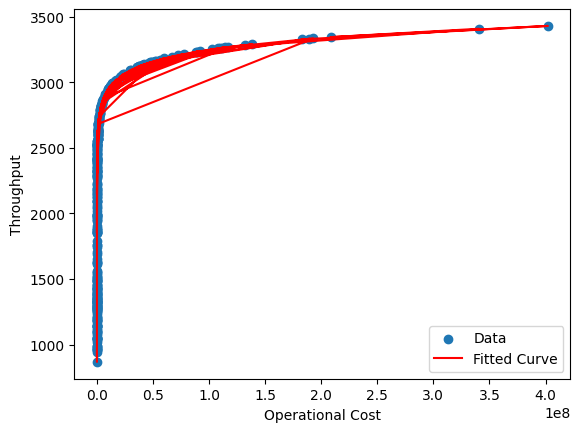

130.28834457097554 850.0


In [43]:
# model to predict throughput given operational cost
from scipy.optimize import curve_fit

data = pd.DataFrame({
    'Throughput': monthly['Total Container Throughput (Thousand Twenty-Foot Equivalent Units)'],
    'Operational Cost': monthly['Operational Cost']
})

def logarithmic_function(x, a, b):
    return a * np.log(x) + b
params, covariance = curve_fit(logarithmic_function, data['Operational Cost'], data['Throughput'])
a,b = params

plt.scatter(data['Operational Cost'], data['Throughput'], label='Data')
plt.plot(data['Operational Cost'], logarithmic_function(data['Operational Cost'], a, b), 'r', label='Fitted Curve')
plt.xlabel('Operational Cost')
plt.ylabel('Throughput')
plt.legend()
plt.show()
print(a,b)

# to send
# a,b params
# latest operational cost
# +- threshold